In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('carInsurance_train.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 468.8+ KB


In [4]:
#from time import strptime

In [5]:
#strptime('may','%b').tm_mon

In [6]:
#import calendar
#abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}

In [7]:
#abbr_to_num['Jan']

In [8]:
num_cols =df.select_dtypes(include=np.number).columns
df_num=df[num_cols]
df_num.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


In [9]:
import statsmodels.api as sm

In [10]:
x = df_num.drop(['Id','CarInsurance'],axis=1)
y = df_num['CarInsurance']

In [11]:
model=sm.GLM(y,sm.add_constant(x),family=sm.families.Binomial())
model.fit().summary()

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           CarInsurance   No. Observations:                 4000
Model:                            GLM   Df Residuals:                     3990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.5
Date:                Thu, 09 Jul 2020   Deviance:                       5000.9
Time:                        13:24:17   Pearson chi2:                 4.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2438      0.153      1.590      0.112      -0.057       0.544
Age                0.0007      0.003      0.233      0.816      -0.005       0.006
Default           -0.4910      0.319     -1.537      0.124      -1.117       0.135
Balance          1.23e-05    9.6e-06      1.280      0.200   -6.53e-06    3.11e-05
HHInsurance       -0.9063      0.070    -12.898      0.000      -1.044      -0.769
CarLoan           -0.4132      0.107     -3.864      0.000      -0.623      -0.204
LastContactDay    -0.0097      0.004     -2.383      0.017      -0.018      -0.002
NoOfContacts      -0.0938      0.016     -6.014      0.000      -0.124      -0.063
DaysPassed         0.0016      0.000      4.230      0.000       0.001       0.002
PrevAttempts       0.1278      0.024      5.335      0.000       0.081       0.175
==================================================================================
"""

On first and second line we are separating our outcome column as y which is our dependent variable and all other columns as independent variable as X. On third line we are using GLM to carry out the logistic regression with statsmodels.The generalized linear models (GLMs) are a broad class of models that include linear regression, ANOVA, Poisson regression, log-linear models etc.

We specify family as sm.families.Binomial because we have only two classes in our outcome or dependent variable and this is how model understands that we want to perform logistic regression with two classes i,e; 0 and 1. sm_constant is used to add 1 to wo because nothing is multiplied with wo,it means it is multiplied by 1,we need to add it explicitly in statsmodels. When we print summary we get :

## Logistic Regression Summary
P-values less than the threshold which is 0.05 are considered non-significant.So,you can remove them but check whether removing them increases the chi2(chi squared) score and decreases the deviance.Because chi2 measure how good the model fits to the data and deviance measures badness of fit(higher the number ,worst the fit.)

In [12]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625433
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.071     
Dependent Variable: CarInsurance     AIC:              5021.4638 
Date:               2020-07-09 13:24 BIC:              5078.1103 
No. Observations:   4000             Log-Likelihood:   -2501.7   
Df Model:           8                LL-Null:          -2693.7   
Df Residuals:       3991             LLR p-value:      5.3049e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               0.0045   0.0017   2.6418 0.0082  0.0012  0.0079
Default          -0.4863   0.3194  -1.5227 0.1278 -1.1122  0.1396


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=0.2)
logreg.fit(x_train, y_train)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[604 107]
 [290 199]]


In [16]:
802/1200

0.6683333333333333

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75       711
           1       0.65      0.41      0.50       489

    accuracy                           0.67      1200
   macro avg       0.66      0.63      0.63      1200
weighted avg       0.67      0.67      0.65      1200



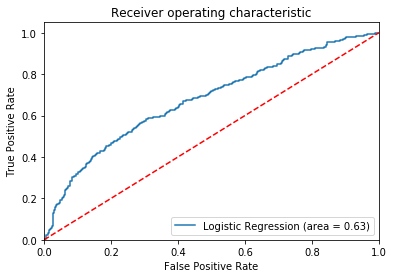

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [20]:
df.shape

(4000, 19)

In [21]:
df.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [22]:
df.drop(['Outcome'],axis=1,inplace=True)

In [23]:
df['Job'].mode()

0    management
dtype: object

In [24]:
df['Job'].fillna(df['Job'].mode()[0],inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [27]:
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])

In [28]:
df.dtypes

Id                           int64
Age                          int64
Job                         object
Marital                     object
Education                   object
Default                      int64
Balance                      int64
HHInsurance                  int64
CarLoan                      int64
Communication               object
LastContactDay               int64
LastContactMonth            object
NoOfContacts                 int64
DaysPassed                   int64
PrevAttempts                 int64
CallStart           datetime64[ns]
CallEnd             datetime64[ns]
CarInsurance                 int64
dtype: object

In [29]:
df['Job'].unique()

array(['management', 'student', 'technician', 'admin.', 'blue-collar',
       'services', 'retired', 'self-employed', 'entrepreneur',
       'unemployed', 'housemaid'], dtype=object)

In [30]:
month = {'Job':{'management':1,'technician':2,'blue-collar':3,'admin.':4,'services':5,'retired':6,'unemployed':7,'self-employed':8,'student':9,'entrepreneur':10,'housemaid':11,'unemployed':12},'LastContactMonth':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [31]:
df.replace(month,inplace=True)

In [32]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,1,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,2020-07-09 13:45:20,2020-07-09 13:46:30,0
2,3,29,1,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,2020-07-09 16:30:24,2020-07-09 16:36:04,1
3,4,25,9,single,primary,0,373,1,0,cellular,11,5,2,-1,0,2020-07-09 12:06:43,2020-07-09 12:20:22,1
4,5,30,1,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,2020-07-09 14:35:44,2020-07-09 14:38:56,0
5,6,32,2,single,tertiary,0,1625,0,0,cellular,22,5,1,109,1,2020-07-09 14:58:08,2020-07-09 15:11:24,1


In [33]:
df_num =df[df.select_dtypes(include=np.number).columns]
df_cat =df[df.select_dtypes(include='object').columns]

In [34]:
df_dummy =pd.get_dummies(df_cat)

In [35]:
df_new = pd.concat([df_num,df_dummy],axis=1)

In [36]:
df_new.head()

,Id,Age,Job,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,...,PrevAttempts,CarInsurance,Marital_divorced,Marital_married,Marital_single,Education_primary,Education_secondary,Education_tertiary,Communication_cellular,Communication_telephone
0,1,32,1,0,1218,1,0,28,1,2,...,0,0,0,0,1,0,0,1,0,1
2,3,29,1,0,637,1,0,3,6,1,...,1,1,0,0,1,0,0,1,1,0
3,4,25,9,0,373,1,0,11,5,2,...,0,1,0,0,1,1,0,0,1,0
4,5,30,1,0,2694,0,0,3,6,1,...,0,0,0,1,0,0,0,1,1,0
5,6,32,2,0,1625,0,0,22,5,1,...,1,1,0,0,1,0,0,1,1,0


In [37]:
import statsmodels.api as sm

In [38]:
x = df_num.drop(['Id','CarInsurance','Age','Default','LastContactMonth','Job','Balance'],axis=1)
y = df_num['CarInsurance']

In [39]:
model=sm.GLM(y,sm.add_constant(x),family=sm.families.Binomial())
model.fit().summary()

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           CarInsurance   No. Observations:                 2969
Model:                            GLM   Df Residuals:                     2962
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1915.2
Date:                Thu, 09 Jul 2020   Deviance:                       3830.3
Time:                        13:24:25   Pearson chi2:                 3.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6241      0.101      6.190      0.000       0.426       0.822
HHInsurance       -0.8865      0.080    -11.014      0.000      -1.044      -0.729
CarLoan           -0.5033      0.120     -4.184      0.000      -0.739      -0.268
LastContactDay    -0.0170      0.005     -3.634      0.000      -0.026      -0.008
NoOfContacts      -0.0998      0.018     -5.549      0.000      -0.135      -0.065
DaysPassed         0.0010      0.000      2.446      0.014       0.000       0.002
PrevAttempts       0.1100      0.024      4.550      0.000       0.063       0.157
==================================================================================
"""

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=.4)
logreg.fit(x_train, y_train)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

NameError: name 'final_prediction' is not defined

In [41]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[341 130]
 [192 228]]


In [43]:
573/(318+573)

0.6430976430976431

In [44]:
logit1_model=sm.Logit(y,x)
result=logit1_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651688
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           CarInsurance   No. Observations:                 2969
Model:                          Logit   Df Residuals:                     2963
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                 0.05501
Time:                        13:24:26   Log-Likelihood:                -1934.9
converged:                       True   LL-Null:                       -2047.5
Covariance Type:            nonrobust   LLR p-value:                 1.100e-46
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
HHInsurance       -0.7211      0.076     -9.503      0.000      -0.870      -0.572
CarLoan          